# Assignment 3

In [1]:
import modulesForCalibration as mfc

import warnings
warnings.filterwarnings("ignore")

import math
import numpy as np
import scipy.integrate as integrate
import pandas as pd

from scipy.optimize import fmin, fmin_bfgs

import cmath
import math

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
from tqdm import tqdm
from matplotlib import cm

## Import data

In [2]:
'''Standard & Poors 500 Index,Last: 4104.8301,Change:  -4.1099
Date: 12 avril 2023 √† 15:44 UTC‚àí4,Bid: 4104.1299,Ask: 4105.5498,Size: 1*1,Volume: 0'''

'Standard & Poors 500 Index,Last: 4104.8301,Change:  -4.1099\nDate: 12 avril 2023 √† 15:44 UTC‚àí4,Bid: 4104.1299,Ask: 4105.5498,Size: 1*1,Volume: 0'

Start_date

In [3]:
# Set the start date to compute the maturities
date_str = "2023-04-12"
# create a datetime object from the date string
start_date = datetime.strptime(date_str, "%Y-%m-%d")

Spot Price

In [4]:
S0 = 4104.8301

Rates

In [5]:
r = 0.0485

In [6]:
q = 0.0331026

Import market data

In [7]:
df_price = pd.read_csv("spx_3.csv", index_col=0)


In [8]:
#Filtrer les SPX... qui ne sont pas des SPXW...

In [9]:
df_price

,Calls,Last Sale,Net,Bid,Ask,Volume,IV,Delta,Gamma,Open Interest,...,Puts,Last Sale.1,Net.1,Bid.1,Ask.1,Volume.1,IV.1,Delta.1,Gamma.1,Open Interest.1
Expiration Date,,,,,,,,,,,,,,,,,,,,,
Wed Apr 12 2023,SPXW230412C03450000,673.90,8.30,654.50,655.8,4,6.4237,1.0000,0.0,4,...,SPXW230412P03450000,0.05,0.000,0.0,0.05,0,5.0208,0.0000,0.0,2881
Wed Apr 12 2023,SPXW230412C03600000,531.77,16.12,504.50,505.8,4,4.9903,1.0000,0.0,9,...,SPXW230412P03600000,0.05,0.000,0.0,0.05,0,3.8645,0.0000,0.0,9980
Wed Apr 12 2023,SPXW230412C03625000,506.74,16.09,479.50,480.8,4,4.7542,1.0000,0.0,10,...,SPXW230412P03625000,0.10,0.000,0.0,0.05,0,3.6746,0.0000,0.0,5089
Wed Apr 12 2023,SPXW230412C03650000,358.55,0.00,454.50,455.8,0,4.5186,1.0000,0.0,6,...,SPXW230412P03650000,0.05,0.025,0.0,0.05,16,3.4855,0.0000,0.0,6391
Wed Apr 12 2023,SPXW230412C03675000,0.00,0.00,429.50,430.8,0,4.2836,1.0000,0.0,0,...,SPXW230412P03675000,0.04,0.015,0.0,0.05,250,3.2970,0.0000,0.0,7349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fri Apr 28 2023,SPXW230428C04580000,0.10,0.00,0.05,0.1,0,0.1753,0.0020,0.0,211,...,SPXW230428P04580000,466.13,11.080,461.9,469.80,1,0.2069,-0.9984,0.0,73
Fri Apr 28 2023,SPXW230428C04590000,0.35,0.00,0.05,0.1,0,0.1785,0.0018,0.0,134,...,SPXW230428P04590000,476.38,11.280,471.9,479.80,1,0.1536,-0.9986,0.0,11
Fri Apr 28 2023,SPXW230428C04600000,0.15,0.00,0.05,0.1,0,0.1817,0.0017,0.0,2045,...,SPXW230428P04600000,489.05,14.100,481.8,489.70,1,0.2026,-0.9986,0.0,33


In [10]:
df_price.columns

Index(['Calls', 'Last Sale', 'Net', 'Bid', 'Ask', 'Volume', 'IV', 'Delta',
       'Gamma', 'Open Interest', 'Strike', 'Puts', 'Last Sale.1', 'Net.1',
       'Bid.1', 'Ask.1', 'Volume.1', 'IV.1', 'Delta.1', 'Gamma.1',
       'Open Interest.1'],
      dtype='object')

In [11]:
callPrices = df_price[['Strike']] #['Last Sale','Strike']]
# Compute the mid-price
callPrices['Price'] = np.abs(df_price['Bid'].array + df_price['Ask'].array)/2
# Convert index to datetime
callPrices.index = pd.to_datetime(callPrices.index)

# Getting the weights inversely proportional to bid-ask spread
callPrices['w'] = np.abs(1/(df_price['Bid'].array - df_price['Ask'].array))

# define a function to compute the difference in days between two dates
def date_diff(date):
    diff = (date - start_date)
    return diff.days

# create a new column in the DataFrame that contains the difference in days
callPrices['Maturity'] = callPrices.index.to_series().apply(date_diff)
callPrices['Maturity'] = callPrices['Maturity']/365.25
#callPrices['Strike'] = np.log(callPrices['Strike'].array)

callPrices = callPrices[callPrices['Strike']>=S0]

# drop today
callPrices = callPrices[callPrices['Maturity']!=0]
#579 avec zero mat included

In [125]:
putPrices = df_price[['Strike']] #['Last Sale','Strike']]
# Compute the mid-price
putPrices['Price'] = np.abs(df_price['Bid.1'].array + df_price['Ask.1'].array)/2
# Convert index to datetime
putPrices.index = pd.to_datetime(putPrices.index)

# Getting the weights inversely proportional to bid-ask spread
putPrices['w'] = np.abs(1/(df_price['Bid.1'].array - df_price['Ask.1'].array))

# define a function to compute the difference in days between two dates
def date_diff(date):
    diff = (date - start_date)
    return diff.days

# create a new column in the DataFrame that contains the difference in days
putPrices['Maturity'] = putPrices.index.to_series().apply(date_diff)
putPrices['Maturity'] = putPrices['Maturity']/365.25
#callPrices['Strike'] = np.log(callPrices['Strike'].array)

putPrices = putPrices[putPrices['Strike']<=S0]

# drop today
putPrices = putPrices[putPrices['Maturity']!=0]
#579 avec zero mat included

Visualize market data

In [12]:
callPrices

,Strike,Price,w,Maturity
Expiration Date,,,,
2023-04-13,4105.0,16.350,10.0,0.002738
2023-04-13,4110.0,13.750,10.0,0.002738
2023-04-13,4115.0,11.400,5.0,0.002738
2023-04-13,4120.0,9.300,5.0,0.002738
2023-04-13,4125.0,7.450,10.0,0.002738
...,...,...,...,...
2023-04-28,4580.0,0.075,20.0,0.043806
2023-04-28,4590.0,0.075,20.0,0.043806
2023-04-28,4600.0,0.075,20.0,0.043806


In [126]:
putPrices

,Strike,Price,w,Maturity
Expiration Date,,,,
2023-04-13,3450.0,0.025,20.000000,0.002738
2023-04-13,3500.0,0.025,20.000000,0.002738
2023-04-13,3575.0,0.025,20.000000,0.002738
2023-04-13,3600.0,0.025,20.000000,0.002738
2023-04-13,3625.0,0.025,20.000000,0.002738
...,...,...,...,...
2023-04-28,4080.0,38.250,3.333333,0.043806
2023-04-28,4085.0,39.950,3.333333,0.043806
2023-04-28,4090.0,41.650,3.333333,0.043806


In [13]:
callPrices.describe()

,Strike,Price,w,Maturity
count,542.000000,542.000000,542.000000,542.000000
mean,4241.780443,9.665129,8.420357,0.024994
std,150.373269,12.544911,5.834118,0.013013
min,4105.000000,0.025000,2.000000,0.002738
25%,4155.000000,0.350000,3.333333,0.016427
50%,4210.000000,3.575000,6.666667,0.024641
75%,4285.000000,15.137500,10.000000,0.035592
max,6200.000000,55.650000,20.000000,0.043806


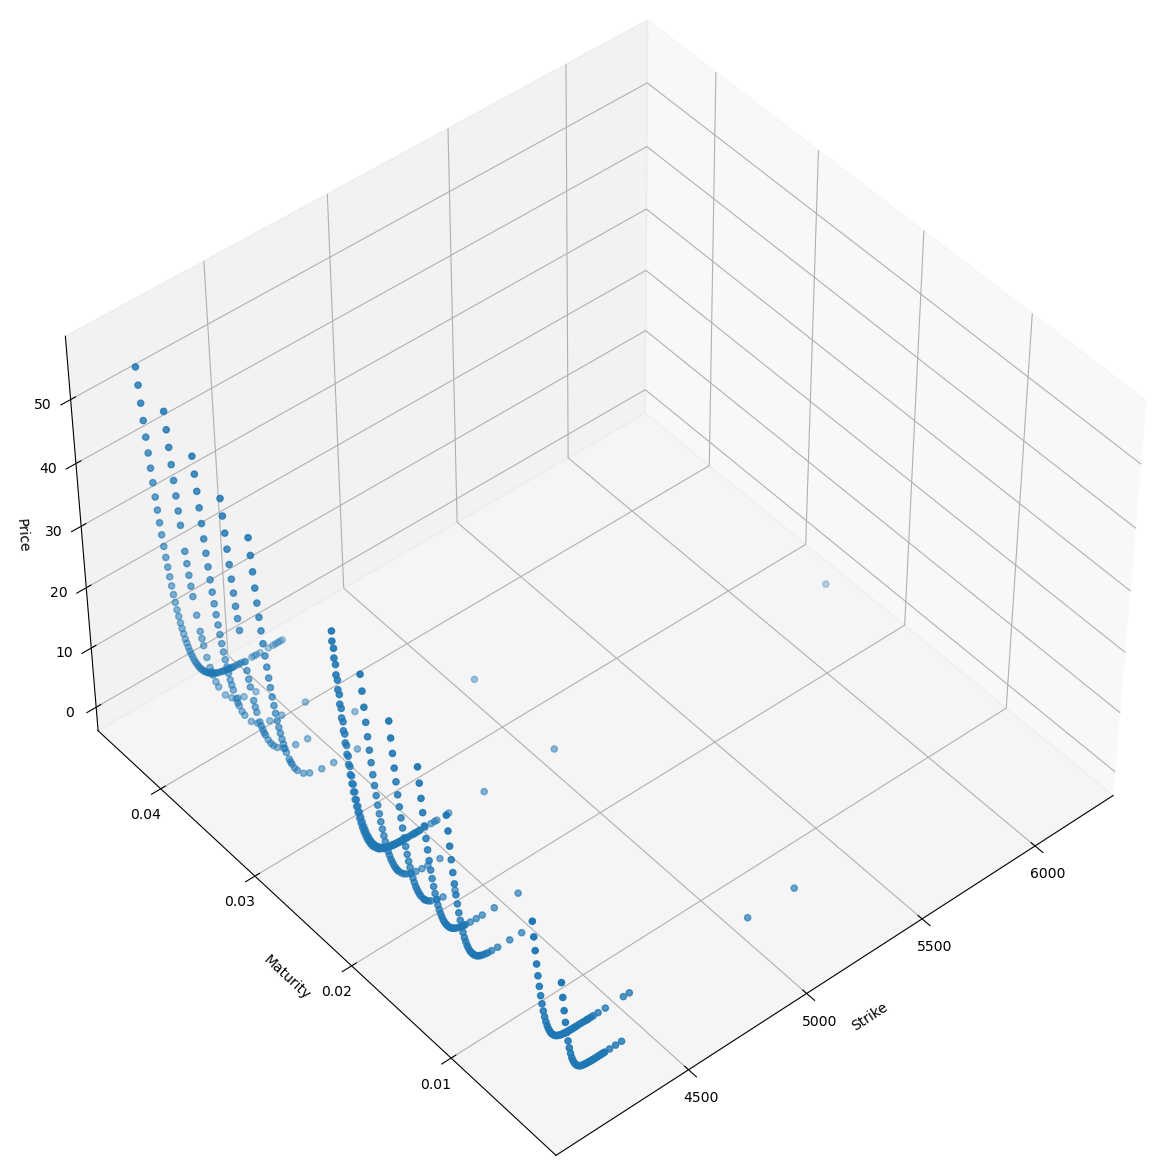

In [14]:
# create 3D scatter plot
fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(callPrices['Strike'], callPrices['Maturity'], callPrices['Price'])#,s=50)
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Price'], cmap=cm.coolwarm)
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.show()

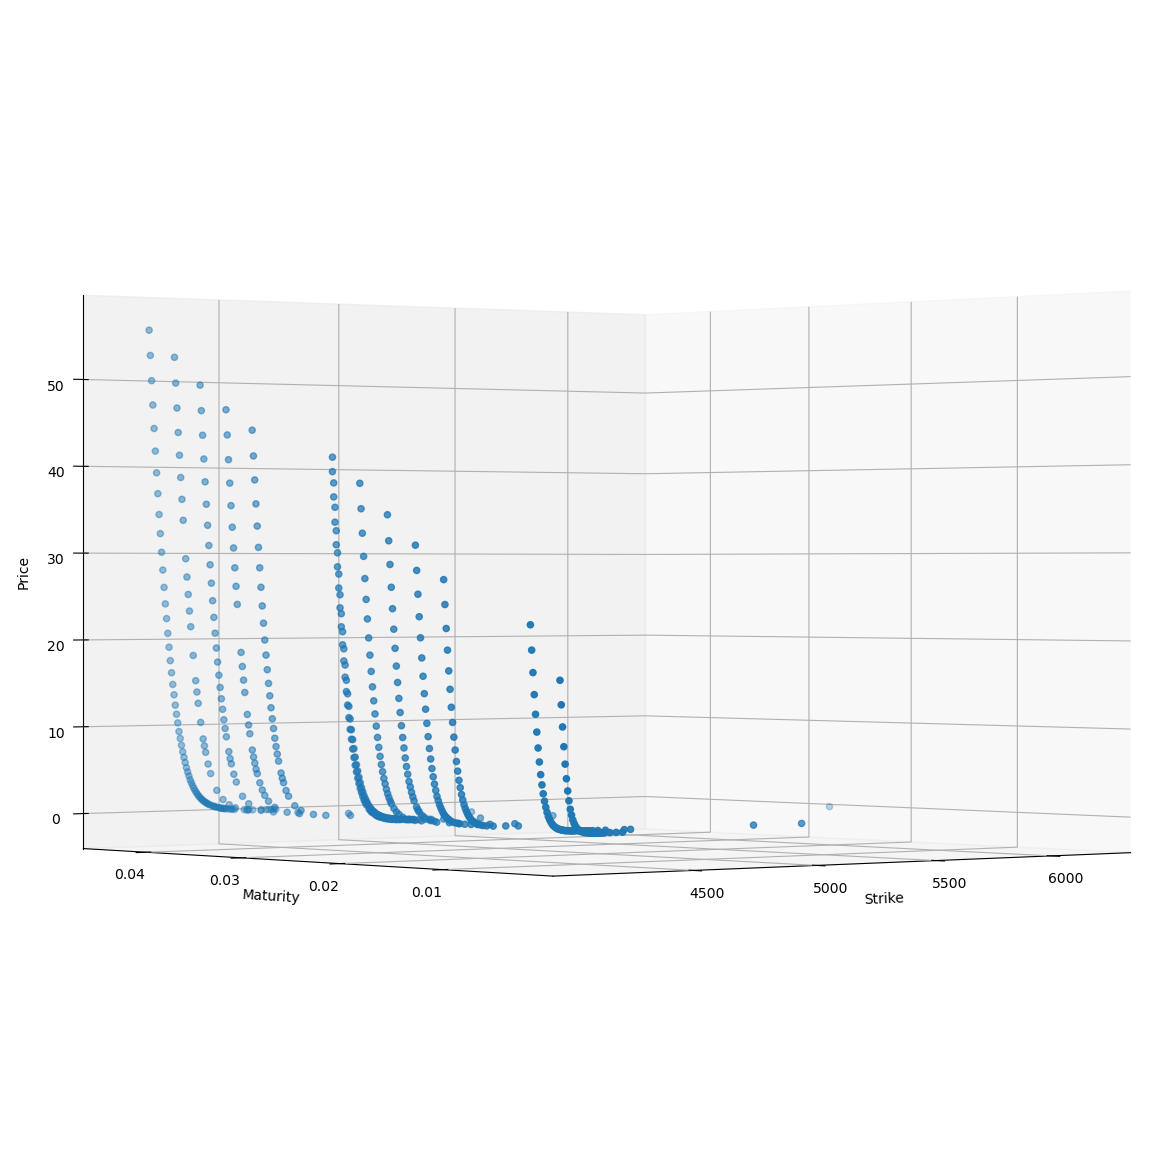

In [15]:
# create 3D scatter plot
fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(callPrices['Strike'], callPrices['Maturity'], callPrices['Price'])#,s=50)
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Price'], cmap=cm.coolwarm)
ax.view_init(elev=0, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.show()

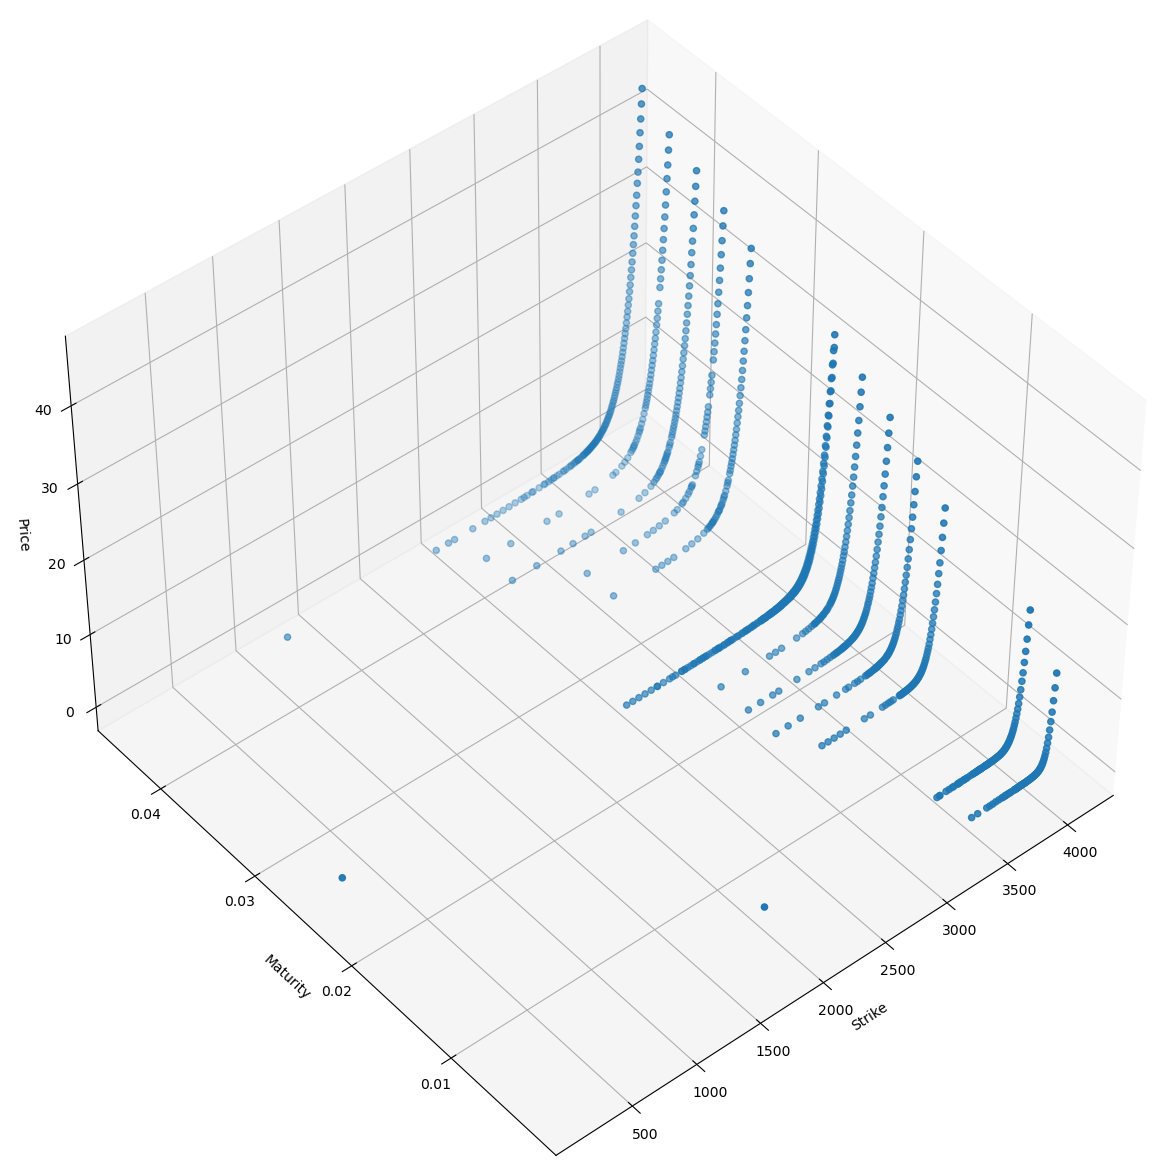

In [127]:
# create 3D scatter plot
fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(putPrices['Strike'], putPrices['Maturity'], putPrices['Price'])#,s=50)
#ax.plot_surface(callPrices['Strike'], callPrices['Maturity'], callPrices['Price'], cmap=cm.coolwarm)
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.show()

### Building the marketprice matrix

In [16]:
strikes = pd.Series(callPrices['Strike'].unique()).sort_values().to_list()
maturities = pd.Series(callPrices['Maturity'].unique()).sort_values().to_list()
lenK = len(strikes)
lenT = len(maturities)

In [17]:
#marketPrices = np.zeros((lenK, lenT))

#marketPrices = []
strike_m = []

#for i in strikes: 
for j in maturities: 
        #print(i, j)
        strike_m_temp = callPrices[(callPrices['Maturity']==j)]['Strike'].to_list()
        #marketPrices_temp = callPrices[(callPrices['Maturity']==j)]['Price'].to_list()
        
        #marketPrices.append(marketPrices_temp)
        strike_m.append(strike_m_temp)
        

In [18]:
strikes = set(strike_m[0])
for i in range(1,len(strike_m)):
    strikes = strikes.intersection(set(strike_m[i]))

strikes = list(strikes)
strikes = sorted(strikes)
print(strikes)

[4105.0, 4110.0, 4115.0, 4120.0, 4125.0, 4130.0, 4135.0, 4140.0, 4150.0, 4165.0, 4170.0, 4180.0, 4190.0, 4195.0, 4200.0, 4210.0, 4220.0, 4225.0, 4230.0, 4240.0, 4250.0, 4275.0, 4300.0, 4350.0]


In [19]:
marketPrices = np.zeros((len(strikes), len(maturities)))
w = np.zeros((len(strikes), len(maturities)))
for j in range(len(maturities)):
    for i in range(len(strikes)):
        #print(maturities[j])
        #print(strikes[i])
        #print(callPrices[(callPrices['Maturity']== maturities[j]) & (callPrices['Strike']==strikes[i])]['Price'][0])
        marketPrices[i,j] = callPrices[(callPrices['Maturity']== maturities[j]) & (callPrices['Strike']==strikes[i])]['Price'][0]
        w[i,j] = callPrices[(callPrices['Maturity']== maturities[j]) & (callPrices['Strike']==strikes[i])]['w'][0]
        
marketPrices = marketPrices.T
w = w.T



# Heston model:

#### Parameters
κ is the mean reversion speed, 
θ is the long run variance,
σ is the volatility of the volatility.

In [20]:
#Generating Option Price Surface Under A model from the list         
def generic_CF(u, params, T, model):
    
    if (model == 'GBM'):
        
        sig = params[0];
        mu = np.log(S0) + (r-q-sig**2/2)*T;
        a = sig*np.sqrt(T);
        phi = np.exp(1j*mu*u-(a*u)**2/2);
        
    elif(model == 'Heston'):
        
        kappa  = params[0];
        theta  = params[1];
        sigma  = params[2];
        rho    = params[3];
        v0     = params[4];

        tmp = (kappa-1j*rho*sigma*u);
        g = np.sqrt((sigma**2)*(u**2+1j*u)+tmp**2);
        
        pow1 = 2*kappa*theta/(sigma**2);

        numer1 = (kappa*theta*T*tmp)/(sigma**2) + 1j*u*T*r + 1j*u*math.log(S0); # manque un q ici en fait (dans le python file)
        log_denum1 = pow1 * np.log(np.cosh(g*T/2)+(tmp/g)*np.sinh(g*T/2));
        tmp2 = ((u*u+1j*u)*v0)/(g/np.tanh(g*T/2)+tmp);
        log_phi = numer1 - log_denum1 - tmp2;
        phi = np.exp(log_phi);

    elif (model == 'VG'):
        
        sigma  = params[0];
        nu     = params[1];
        theta  = params[2];

        if (nu == 0):
            mu = math.log(S0) + (r-q - theta -0.5*sigma**2)*T;
            phi  = math.exp(1j*u*mu) * math.exp((1j*theta*u-0.5*sigma**2*u**2)*T);
        else:
            mu  = math.log(S0) + (r-q + math.log(1-theta*nu-0.5*sigma**2*nu)/nu)*T;
            phi = cmath.exp(1j*u*mu)*((1-1j*nu*theta*u+0.5*nu*sigma**2*u**2)**(-T/nu));
            
    elif (model == 'VGSA'):
        
        sigma  = params[0];
        nu     = params[1];
        theta  = params[2];
        kappa  = params[3]; 
        eta    = params[4];
        lbda   = params[5];
        
        #cf if mu = 0 ce qu'on fait
        #if (nu == 0):
        psi_VG_i = - np.log(1-theta*nu-sigma**2*nu*0.5)/nu
        psi_VG_u = - np.log(1-1j*u*theta*nu+sigma**2*nu*u**2*0.5)/nu
        
        tp = 1j*u * (np.log(S0) + (r-q)*T)
        
        def A(v):
            ga = np.sqrt(kappa**2 - 2*lbda**2*1j*v)
            A_t_u = np.exp(kappa**2*eta*T/(lbda**2))/((np.cosh(ga*T/2)+(kappa/ga)*np.sinh(ga*T/2))**(kappa*2*eta/(lbda**2)))
            return(A_t)
        def B(v):
            ga = np.sqrt(kappa**2 - 2*lbda**2*1j*v)
            B_t = 2*1j*v / (kappa+ ga/np.tanh(ga*T/2))
            return(B_t)
        
        A_t_u = np.exp(kappa**2*eta*T/(lbda**2))/((np.cosh(ga*T/2)+(kappa/ga)*np.sinh(ga*T/2))**(kappa*2*eta/(lbda**2)))
        B_t_u = 2*1j*u / (kappa+ ga/np.tanh(ga*T/2))
        
        phi_up = A(-1j*psi_VG_u)*np.exp(B(-j*psi_VG_u)/nu)
        phi_down = A(-1j*psi_VG_i)*np.exp(B(-j*psi_VG_i)/nu)
        
        phi = np.exp(tp)*phi_up/phi_down
        
    return phi

In [21]:
def genericFFT(params, T, model):
    
    # forming vector x and strikes km for m=1,...,N
    km = []
    xX = []
    
    # discount factor
    df = math.exp(-r*T)
    
    for j in range(N):
        
        nuJ=j*eta
        km.append(beta+j*lda)
        
        psi_nuJ = df*generic_CF(nuJ-(alpha+1)*1j, params, T, model)/((alpha + 1j*nuJ)*(alpha+1+1j*nuJ))
        if j == 0:
            wJ = (eta/2)
        else:
            wJ = eta
        
        xX.append(cmath.exp(-1j*beta*nuJ)*psi_nuJ*wJ)
     
    yY = np.fft.fft(xX)
    
    cT_km = []    
    for i in range(N):
        multiplier = math.exp(-alpha*km[i])/math.pi
        cT_km.append(multiplier*np.real(yY[i]))
    
    return km, cT_km


In [22]:
# function for the search: 
def myRange(start, finish, increment):
    while (start <= finish):
        yield start
        start += increment
        
def objFunc(v, x0, x1, x2):
    # Paraboloid centered on (x, y), with scale factors (10, 20) and minimum 30
    return 10.0*(v[0]-x0)**2 + 20.0*(v[1]-x1)**2 + 30.0*(v[2]-x2)**2 + 40.0

# Gradient-Based routines e.g. Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm

# Heston with equal weights

In [23]:
np.shape(marketPrices)

(12, 24)

In [24]:
len(maturities)

12

In [25]:
len(strikes)

24

In [26]:
params = [2.3,     0.046,   0.0825, -0.53,    0.054]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model ='Heston'

def callbackF(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model)

num_iter = 1
[xopt, fopt, gopt, Bopt, func_calls, grad_calls, warnflg] = fmin_bfgs(
        mfc.eValue,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF,
        maxiter=20,
        full_output=True, 
        retall=False)

20.460925548001136
20.4609255471264
20.460925814420616
20.46092551868241
20.460925552170313
20.46093247397318
4.217451315627437
4.21745131313313
4.2174516556463315
4.217451280338625
4.217451320959171
4.21746008558187
41.376268156635845
41.37626816074024
41.376267955454466
41.3762681307793
41.376268161171225
41.376262888675775
80.42606258550792
80.42606257504757
80.426062447013
80.42606256399561
80.42606258900518
80.4260589147582
39.72400194276201
39.72400193548118
39.72400173804005
39.7240019166749
39.7240019467634
39.72399657007261
71.72544436994127
71.72544435708501
71.72544422124963
71.72544434776778
71.72544437331777
71.72544043386222
5.721214167026973
5.72121416393174
5.721214506139536
5.721214132497497
5.721214172215313
5.721205403760039
10.971538181273038
10.971538181040794
10.971537594672071
10.97153820829175
10.971538177543902
10.971523157571378
1.6562605853444008
1.656260584606369
1.6562607270572673
1.6562605586508572
1.6562605897005047
1.6562642077007304
 
i = 1
x_i = [ 2.30

1.157872213402206
1.1578722110367592
1.1578722141799398
1.1578722131532275
1.1578722095418275
 
i = 18
x_i = [ 2.27244612 -0.04872989  0.6        -0.66850261 -0.96031431]
1.1578722133694364
f_i = 1.1578722133694364
1.1578447554939566
1.1578447555285283
1.1578447530213078
1.1578447540713863
1.1578447553270594
1.1578447577184914
 
i = 19
x_i = [ 2.27302742 -0.04856813  0.59996655 -0.66807358 -0.96030877]
1.1578447554939566
f_i = 1.1578447554939566
1.1577922913522154
1.157792291386345
1.1577922888924521
1.157792289894397
1.1577922912420833
1.1577922983775482
 
i = 20
x_i = [ 2.27361403 -0.04827659  0.59998765 -0.66736729 -0.96029888]
1.1577922913522154
f_i = 1.1577922913522154
         Current function value: 1.157792
         Iterations: 20
         Function evaluations: 348
         Gradient evaluations: 58


In [27]:
xopt

array([ 2.27361403, -0.04827659,  0.59998765, -0.66736729, -0.96029888])

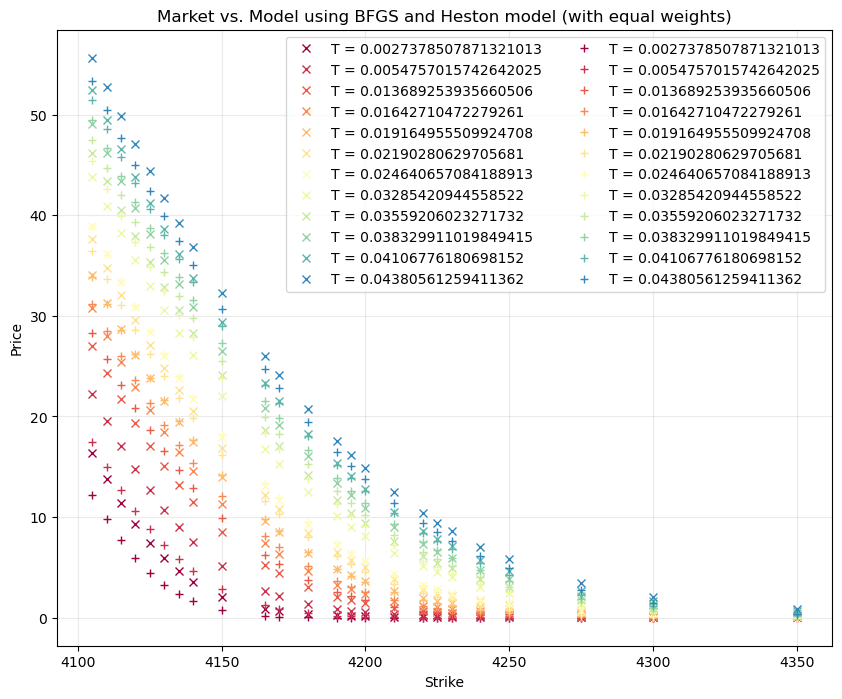

In [28]:
params2 = xopt
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices[i,j] = cT_km[0]


# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
# create a list of colors to cycle through
colors = [colormap(i) for i in np.linspace(0, 0.9, len(maturities))]

#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
plt.gca().set_prop_cycle(color=colors)
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model using BFGS and Heston model (with equal weights)')
plt.savefig('MarketvsModel_BFGS.png')
plt.show() 


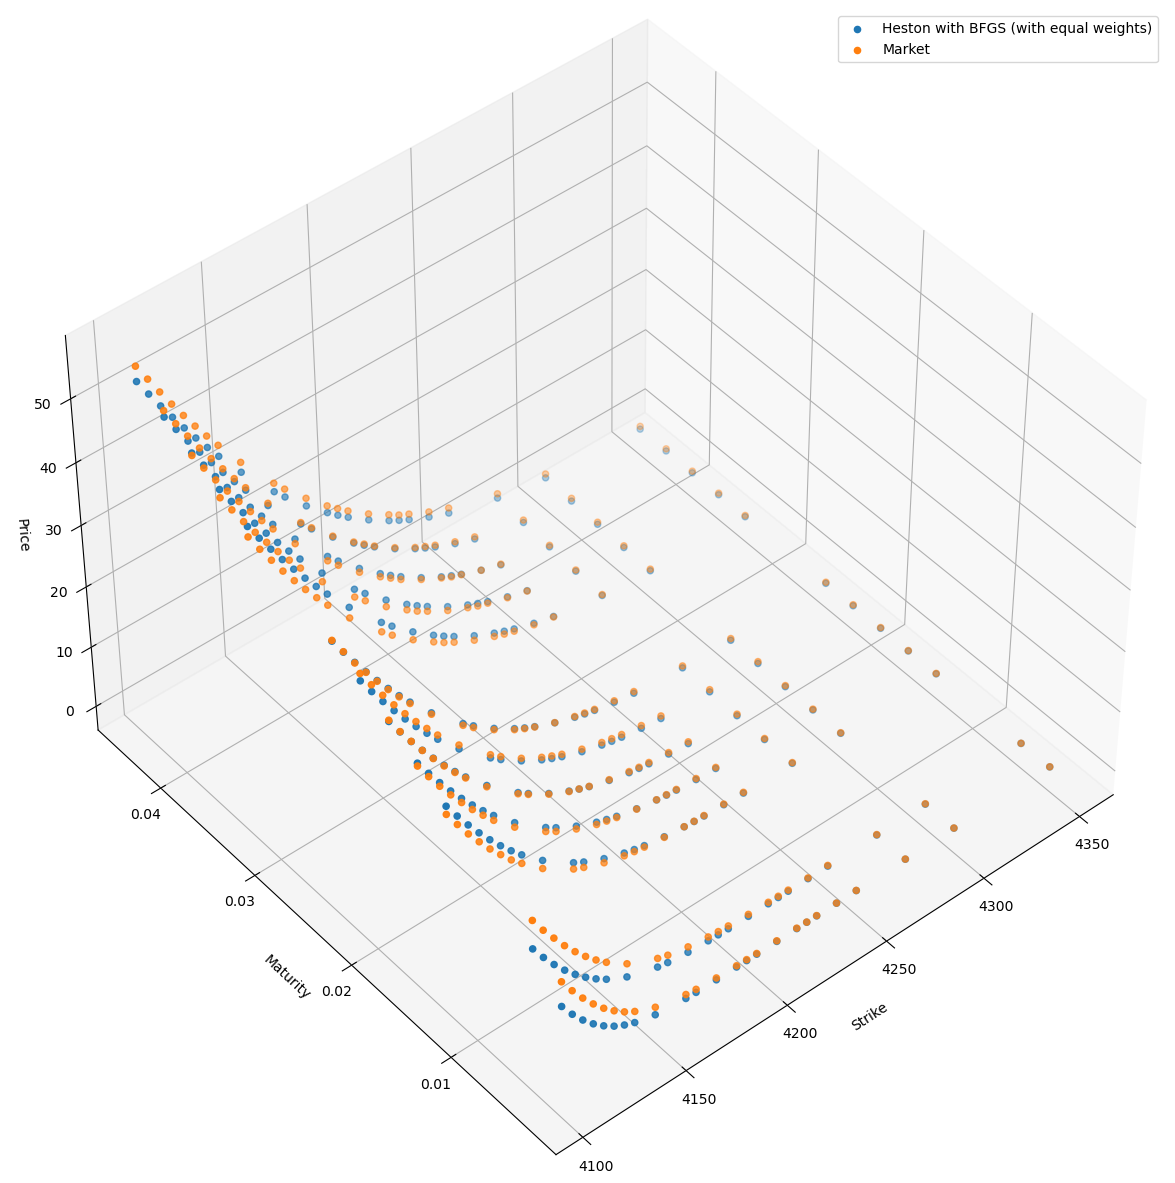

In [29]:
# create a meshgrid of the maturities and strikes
maturities_, strikes_ = np.meshgrid(maturities, strikes)

maturities_flat = maturities_.flatten()
strikes_flat =  strikes_.flatten()
prices_flat =  marketPrices.flatten()


fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(strikes_flat, maturities_flat, modelPrices.T, label='Heston with BFGS (with equal weights)')
ax.scatter(strikes_, maturities_, marketPrices.T, label='Market')
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.legend()

plt.show()

!!!!!!!!!!!!!!!!!!!!!!!! Short maturity messy market point both the model is not enough some vol shit and leads to convergence difficult for the parameters


# Heston with weights inversely proportional to bid-ask spread

In [30]:
params = [2.3,     0.046,   0.0825, -0.53,    0.054]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model ='Heston'

def callbackF_w(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue_w(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model, w)

num_iter = 1
[xopt_w, fopt_w, gopt_w, Bopt_w, func_calls_w, grad_calls_w, warnflg_w] = fmin_bfgs(
        mfc.eValue_w,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF_w,
        maxiter=20,
        full_output=True, 
        retall=False)

15.421483335524792
15.421483334877848
15.421483533852268
15.421483307550877
15.421483339620798
15.421488708067281
3.20116918050907
3.201169178909324
3.201169421678142
3.201169150517351
3.2011691852194457
3.2011754687462584
31.939293981335243
31.939293983959193
31.939293827344937
31.9392939552068
31.939293986270233
31.939289722477383
58.186131829739374
58.18613182235504
58.18613171536493
58.18613180673998
58.18613183367504
58.186135073028446
30.926759703623066
30.92675969736876
30.9267595479153
30.926759677388052
30.926759707788325
30.926764023939604
18.72095447547407
18.720954470825166
18.720954662392046
18.72095444754243
18.720954479821646
18.720949368908443
6.974765942045963
6.974765941794522
6.9747655796385635
6.974765961929663
6.97476593913611
6.974756321881496
1.400451296459661
1.4004512960203357
1.4004513950455078
1.4004512767236947
1.4004512997556655
1.4004535357779522
 
i = 1
x_i = [ 2.30012216  0.00855063  0.0877822  -0.53077343 -0.9604754 ]
1.400451296459661
f_i = 1.400451296

1.0553783042288474
1.0552812913848626
1.0552812913522076
1.0552812862980194
1.055281293160282
1.055281291163649
1.0552815273845182
1.0552714368869205
1.0552714368545124
1.055271431930345
1.055271438638473
1.0552714366446956
1.055271669860913
1.0552702750553555
1.055270275023072
1.0552702701143772
1.055270276804118
1.0552702748106784
1.0552705076673814
1.0552701356244254
1.055270135592069
1.055270130685342
1.0552701373728388
1.0552701353794116
1.0552703681929119
1.0552701189127989
1.0552701188805056
1.055270113974127
1.0552701206610082
1.0552701186678093
1.0552703514759838
1.0552701184740083
1.055270118441786
1.0552701135352813
1.055270119100045
1.0552701182291055
1.0552703510369956
 
i = 11
x_i = [ 2.30266085 -0.01013561  0.6        -0.66828337 -0.95851361]
1.0552701184740083
f_i = 1.0552701184740083
1.0552701163940355
1.0552701163617886
1.0552701114552434
1.0552701170199106
1.0552701161489981
1.055270348956862
1.0552701080738647
1.0552701080415707
1.0552701031351954
1.0552701086993308

In [31]:
xopt_w

array([ 2.31285613, -0.01611033,  0.59999966, -0.65370581, -0.95888835])

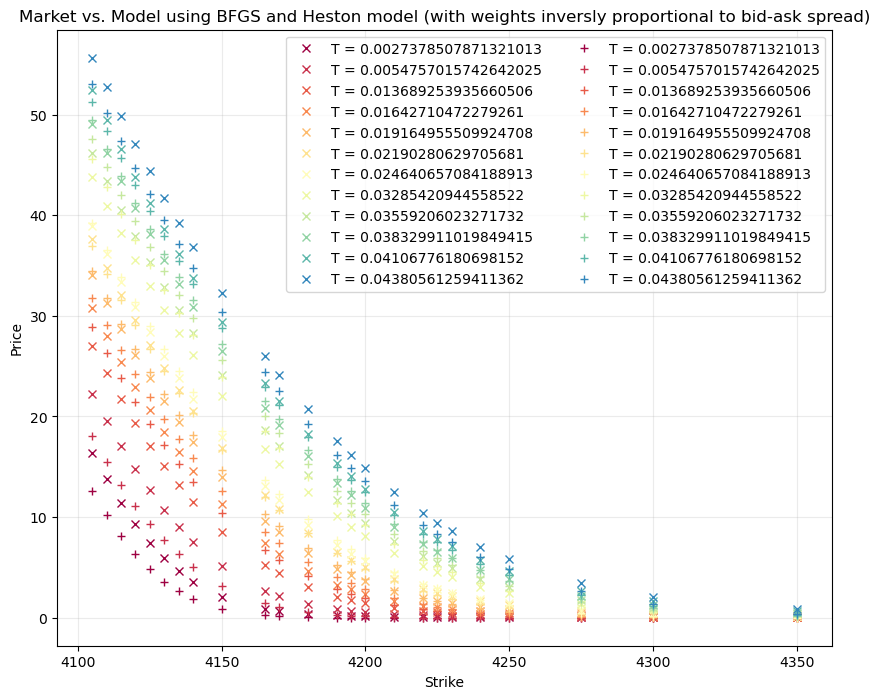

In [32]:
params2 = xopt_w
lenT = len(maturities)
lenK = len(strikes)
modelPrices_w = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices_w[i,j] = cT_km[0]

# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
# create a list of colors to cycle through
colors = [colormap(i) for i in np.linspace(0, 0.9, len(maturities))]

#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
plt.gca().set_prop_cycle(color=colors)
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices_w[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model using BFGS and Heston model (with weights inversly proportional to bid-ask spread)')
plt.savefig('MarketvsModel_BFGS.png')
plt.show() 


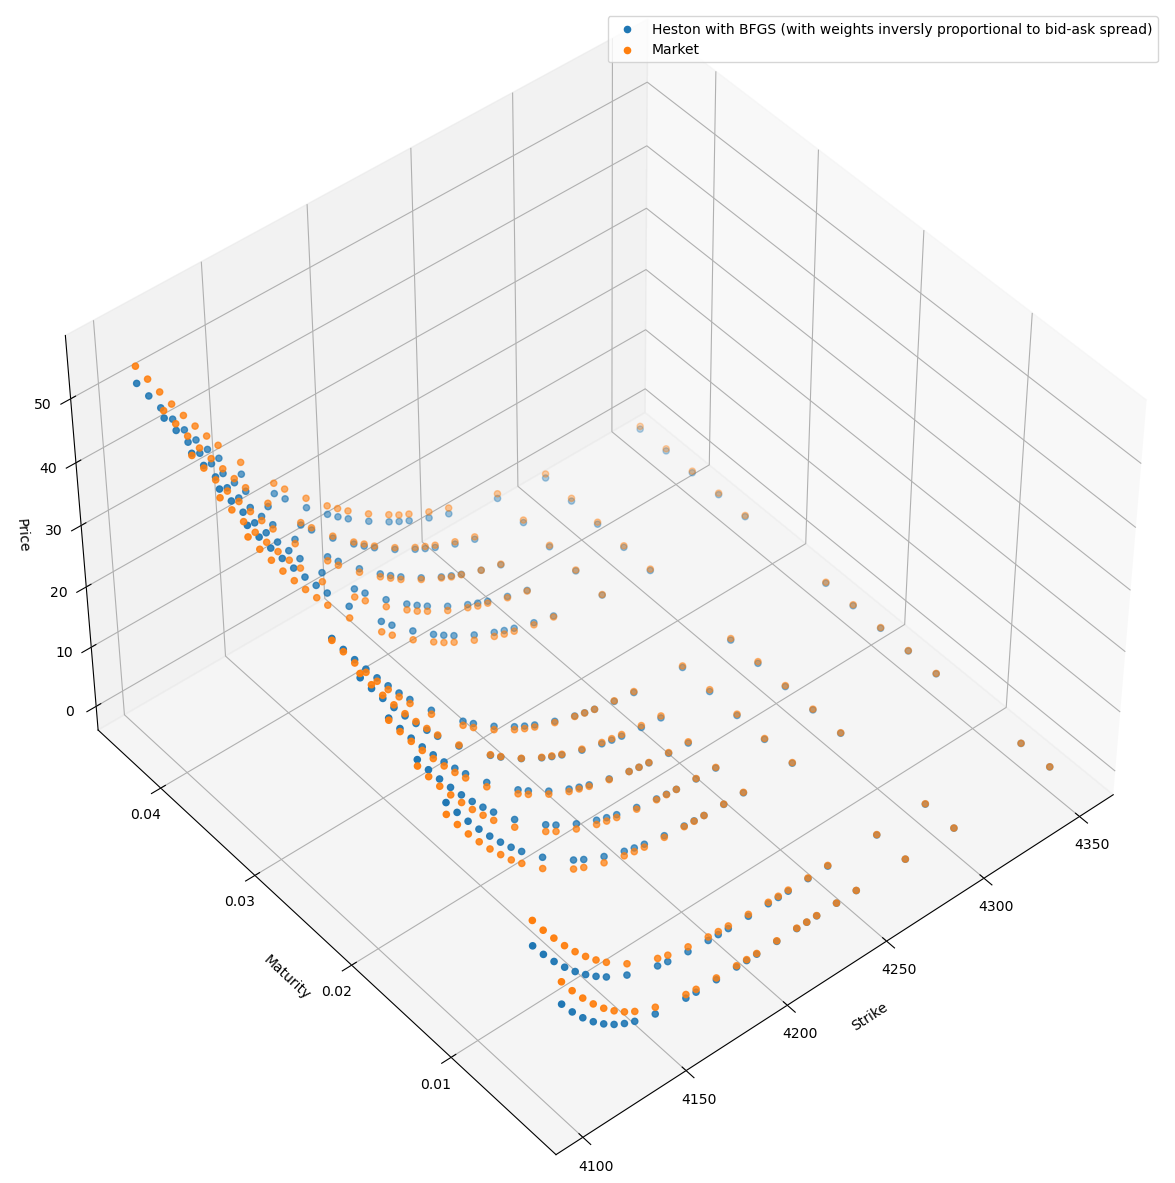

In [33]:
# create a meshgrid of the maturities and strikes
maturities_, strikes_ = np.meshgrid(maturities, strikes)

maturities_flat = maturities_.flatten()
strikes_flat =  strikes_.flatten()
prices_flat =  marketPrices.flatten()


fig = plt.figure(figsize= [15,15])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(strikes_flat, maturities_flat, modelPrices_w.T, label='Heston with BFGS (with weights inversly proportional to bid-ask spread)')
ax.scatter(strikes_, maturities_, marketPrices.T, label='Market')
ax.view_init(elev=45, azim=230)
ax.set_xlabel('Strike')
ax.set_ylabel('Maturity')
ax.set_zlabel('Price')

plt.legend()

plt.show()

# VGSA with equal weights

ΘVGSA = {σ, ν, θ, κ, η, λ}

In [34]:
params = [0.0825, 0.8, 0.046, 2.3, 0.8 , 0.9 ]
params = [0.02351992, 0.03838838, 0.00533235, 2.38917246, 1.89090463, 0.84004647]
#params_v = [0.0825, ?, 0.046, 2.3, ? , v0 ]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model_v = 'VGSA'

def callbackF(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model_v)

num_iter = 1
[xopt_v, fopt_v, gopt_v, Bopt_v, func_calls_v, grad_calls_v, warnflg_v] = fmin_bfgs(
        mfc.eValue,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF,
        maxiter=20,
        full_output=True, 
        retall=False)

1.55174757269954
1.5517523352148637
1.5517454672261457
1.551752582484922
1.5517475710424657
1.5517475728684755
1.5517475727011891
91.19262064748449
91.19261574533962
91.19261526634955
91.19262213997614
91.19262064055258
91.19262066282634
91.19262064526757
15.244070571176099
15.24406359810289
15.24406876892118
15.244072920500727
15.244070569695367
15.244070571696401
15.244070570947931
17.682934717575126
17.682938308468138
17.682934542413108
17.68293342321369
17.682934717380867
17.682934717608788
17.68293471757561
14.929381520745626
14.929372353347656
14.929382445342029
14.929375022486651
14.929381521305347
14.92938152068212
14.929381520756214
1.8637501313701874
1.863741153924407
1.8637538378319747
1.8637415027454576
1.8637501333340247
1.8637501311683902
1.8637501313809468
1.4649455227899937
1.4649456706837876
1.4649454848990613
1.4649459102583913
1.4649455223712673
1.4649455228329151
1.4649455227950023
 
i = 1
x_i = [0.02330015 0.03848554 0.00510117 2.38917254 1.89090462 0.84004647]
1.4

In [35]:
xopt_v

array([1.12592464e-02, 8.55065341e-03, 1.17252459e-03, 4.94453036e+00,
       1.76615711e+00, 8.10736475e-01])

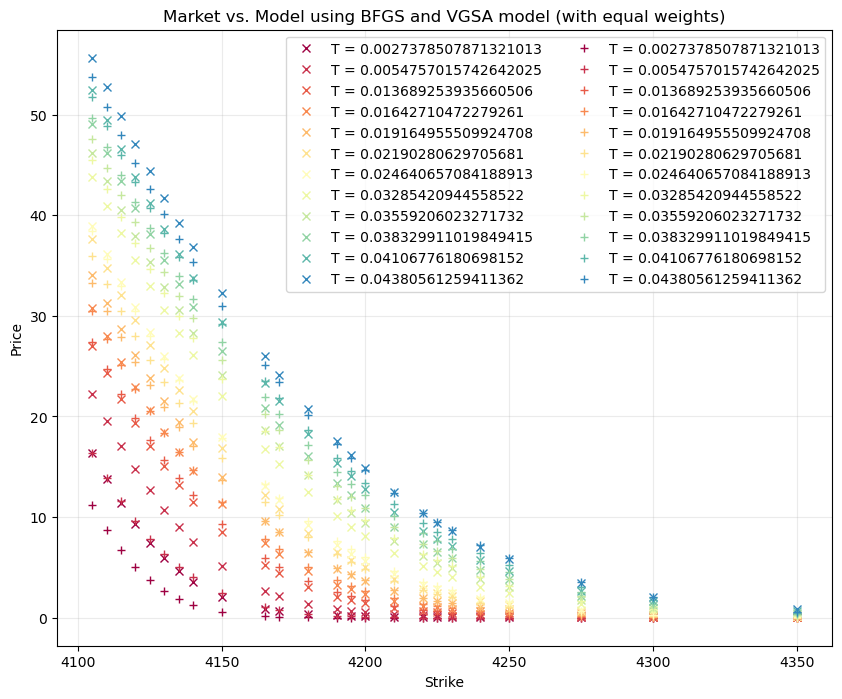

In [36]:
params2 = xopt_v
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model_v)
        modelPrices[i,j] = cT_km[0]


# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
# create a list of colors to cycle through
colors = [colormap(i) for i in np.linspace(0, 0.9, len(maturities))]

#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
plt.gca().set_prop_cycle(color=colors)
for i in range(len(maturities)):
    plt.plot(strikes, marketPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model using BFGS and VGSA model (with equal weights)')
plt.savefig('MarketvsModel_BFGS.png')
plt.show() 


# VGSA with weights inversely proportional to bid-ask spread

In [37]:
xopt_v_w = xopt_v

In [38]:
params = [0.0825, 0.8, 0.046, 2.3, 0.8 , 0.9 ]
params = [0.02351992, 0.03838838, 0.00533235, 2.38917246, 1.89090463, 0.84004647]
#params_v = [0.0825, ?, 0.046, 2.3, ? , v0 ]
# Parameters
alpha = 1.5
eta = 0.2
n = 12

model_v = 'VGSA'

def callbackF_w(xi):
    global num_iter
    global arg
    print(' ')
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue_w(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model_v, w)

num_iter = 1
[xopt_v_w, fopt_v_w, gopt_v_w, Bopt_v_w, func_calls_v_w, grad_calls_v_w, warnflg_v_w] = fmin_bfgs(
        mfc.eValue_w,
        params,
        args=arg, 
        fprime=None,
        callback=callbackF_w,
        maxiter=20,
        full_output=True, 
        retall=False)

1.4329968803546707
1.4329989068608238
1.4329959789033908
1.4329992654731554
1.4329968794618269
1.4329968804457318
1.432996880357732
66.52550674282529
66.52550276991347
66.52550268464172
66.52550787851156
66.52550673790064
66.52550675249805
66.52550674134821
6.713078320417797
6.713075250125399
6.71307740921588
6.713079112999028
6.7130783198239286
6.71307832059783
6.71307832036294
12.815439363074104
12.815440551549946
12.81543929966406
12.815439017341557
12.815439363014665
12.81543936308368
12.815439363071894
7.572627841867183
7.5726201974332685
7.57262930578194
7.572621952837091
7.572627842729007
7.572627841773047
7.572627841875112
1.4310253804648114
1.4310229777925554
1.4310263803603367
1.431023584820516
1.4310253807226865
1.4310253804385402
1.4310253804693895
1.3993312583501758
1.3993310143349924
1.3993313521671848
1.3993314997113766
1.3993312580505057
1.399331258380886
1.3993312583539936
 
i = 1
x_i = [0.02332927 0.03847319 0.00510796 2.38917254 1.89090462 0.84004647]
1.3993312583501

In [46]:
xopt

array([ 2.27361403, -0.04827659,  0.59998765, -0.66736729, -0.96029888])

Results for the different algorihtms:
    

In [47]:
df_param = pd.DataFrame({'Model':['Heston', 'Heston'],'Method':['BFGS with equal weights','BFGS with weights inversely proportional to bid-ask spread']})

list_arg_heston = ['kappa','theta', 'sigma','rho', 'v0']
i=0
for para in list_arg_heston:
    df_param[para] = [xopt[i],xopt_w[i]]
    i+=1
    
df_param

,Model,Method,kappa,theta,sigma,rho,v0
0,Heston,BFGS with equal weights,2.273614,-0.048277,0.599988,-0.667367,-0.960299
1,Heston,BFGS with weights inversely proportional to bi...,2.312856,-0.016110,0.600000,-0.653706,-0.958888


In [48]:
df_param_v = pd.DataFrame({'Model':['VGSA', 'VGSA'],'Method':['BFGS with equal weights','BFGS with weights inversely proportional to bid-ask spread']})

list_arg_vgsa = ['sigma','nu','theta','kappa', 'eta', 'lambda']
i=0
for para in list_arg_heston:
    df_param_v[para] = [xopt_v[i],xopt_v_w[i]]
    i+=1
    
df_param_v

,Model,Method,kappa,theta,sigma,rho,v0
0,VGSA,BFGS with equal weights,0.011259,0.008551,0.001173,4.944530,1.766157
1,VGSA,BFGS with weights inversely proportional to bi...,0.010605,0.007258,0.000836,4.015959,1.822927


### FINDING A STARTING POINT:

In [ ]:
iArray = []
rmseArray = []
rmseMin = 1e10

#set 1: promising starting point
params1 = (1.0, 0.02, 0.05, -0.4, 0.08)
params2 = (3.0, 0.06, 0.10, -0.6, 0.04)
# set 2: This one too
#params1 = (6.0, 0.05, 0.04, +0.7, 0.10)
#params2 = (1.0, 0.02, 0.10, -0.8, 0.04)
    
#set 3: tricky starting point
#params1 = (1.0, 0.0625, 0.0125, -0.7, 0.05)
#params2 = (8.0, 0.02,   0.05,   +0.6, 0.12)
    
# set 4: non-informative
params1 = (4.0, 0.05, 0.03, -0.6, 0.10)
params2 = (1.0, 0.10, 0.05, +0.7, 0.05) 

For Heston

In [ ]:
model = 'Heston'
for i in mfc.myRange(0, 1, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)

For VGSA

In [ ]:
iArray = []
rmseArray = []
rmseMin = 1e10
# set 4: non-informative
params1 = (0.3, 0 , 0.05, 4.0, 0.0, 1.0)
params2 = (0.5, 1 , 0.10, 1.0, 1.0, 1.0) 

In [ ]:
params = [2.3,     0.046,   0.0825, -0.53,    0.054, ]
params_v = [0.0825, ?, 0.046, 2.3, ? , v0 ]

In [ ]:
model = 'VGSA'
for i in mfc.myRange(0, 1, 0.05):
    
    params = i*np.array(params1) + (1.0-i)*np.array(params2)
    iArray.append(i)
     
    rmse = mfc.eValue(params, marketPrices, maturities, strikes, r, q, S0, alpha, eta, n, model)
    rmseArray.append(rmse)
    if (rmse < rmseMin):
        rmseMin = rmse
        optimParams = params

print(rmseMin)
print(optimParams)

# 2. Local volatility surface

In [120]:
def vol_surface(params, strikes, maturities, modelPrices, model, title_):
    Prices = modelPrices.T
    params2 = params
    lenT = 3 * len(maturities)
    lenK = 3 * len(strikes)
    h_strikes = (strikes[-1] - strikes[0]) / lenK
    h_maturities = (maturities[-1] - maturities[0]) / lenT
    strikes_l = np.arange(strikes[0], strikes[-1] + h_strikes, h_strikes)
    maturities_l = np.arange(maturities[0], maturities[-1] + h_maturities, h_maturities)
    lenT = len(maturities_l)
    lenK = len(strikes_l)
    Prices = np.zeros((lenK, lenT))

    print('Computing the prices according to the model and the opt-parameters')
    for i in tqdm(range(lenK)):
        for j in range(lenT):
            T = maturities_l[j]
            K = strikes_l[i]
            [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
            Prices[i, j] = cT_km[0]

    sig_loc = np.zeros((lenK, lenT))
    print('Computing the local volatility surface')
    for i in tqdm(range(1, lenK - 1)):
        for j in range(1, lenT - 1):
            dC_dt = (Prices[i, j + 1] - Prices[i, j - 1]) / (maturities_l[j + 1] - maturities_l[j - 1])
            dC_dK = (Prices[i + 1, j] - Prices[i - 1, j]) / (strikes_l[i + 1] - strikes_l[i - 1])
            dC2_dK2 = (Prices[i + 1, j] - 2 * Prices[i, j] + Prices[i - 1, j]) / ((strikes_l[i + 1] - strikes_l[i]) * (strikes_l[i] - strikes_l[i - 1]))
            sig_loc[i, j] = np.sqrt(2 * (dC_dt + q * Prices[i, j] + (r - q) * strikes_l[i] * dC_dK) / (strikes_l[i] ** 2 * dC2_dK2))

    print(60 * '=')
    # create a meshgrid of the maturities and strikes
    maturities_, strikes_ = np.meshgrid(maturities_l[1:-1], strikes_l[1:-1])

    sig_loc_ = sig_loc[1:-1, 1:-1]
    print(np.shape(maturities_))
    print(np.shape(sig_loc_))

    # show plot
    fig = plt.figure(figsize=[15, 15])
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(strikes_, maturities_, sig_loc_, cmap='rainbow')#cm.coolwarm, vmin=-1, vmax=1)
    #ax.scatter(strikes_, maturities_, sig_loc_, label='Local Volatility Surface')
    #ax.plot_wireframe(strikes_, maturities_, sig_loc_, label='Local Volatility Surface',cmap=cm.coolwarm)
    ax.view_init(elev=15, azim=160)
    ax.set_xlabel('Strike')
    ax.set_ylabel('Maturity')
    ax.set_zlabel('Local Volatility')
    ax.set_title(title_)

    plt.show()


As for the models, the results seem slightly better using with weights inversely proportional to bid-ask spread instead of equal weights, we will plot the local volatility surfaces for both VGSA and Heston model using the parameters obtained with with weights inversely proportional to bid-ask spread.

## 2.1 Local Volatility Surface for Heston model

Computing the prices according to the model and the opt-parameters


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:45<00:00,  1.61it/s]


Computing the local volatility surface


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 4077.66it/s]


(71, 36)
(71, 36)


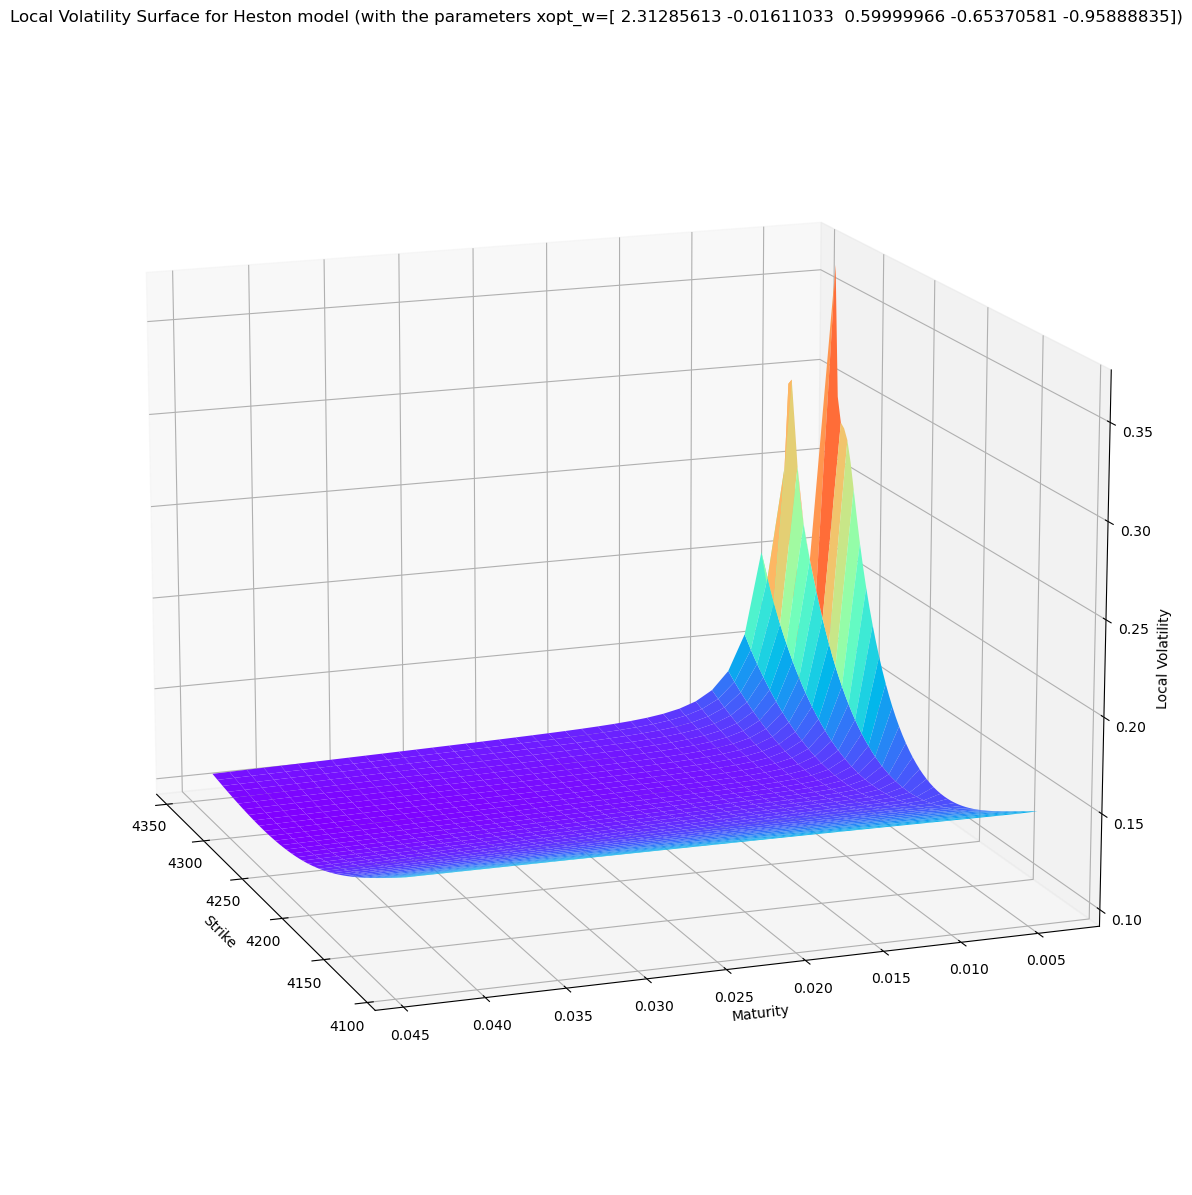

In [121]:
params_ = xopt_w
model_ = 'Heston'
title_ = f'Local Volatility Surface for Heston model (with the parameters xopt_w={xopt_w})'
vol_surface(params_,strikes,maturities,modelPrices,model_, title_)

Computing the prices according to the model and the opt-parameters


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:48<00:00,  1.51it/s]


Computing the local volatility surface


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 3730.14it/s]


(71, 36)
(71, 36)


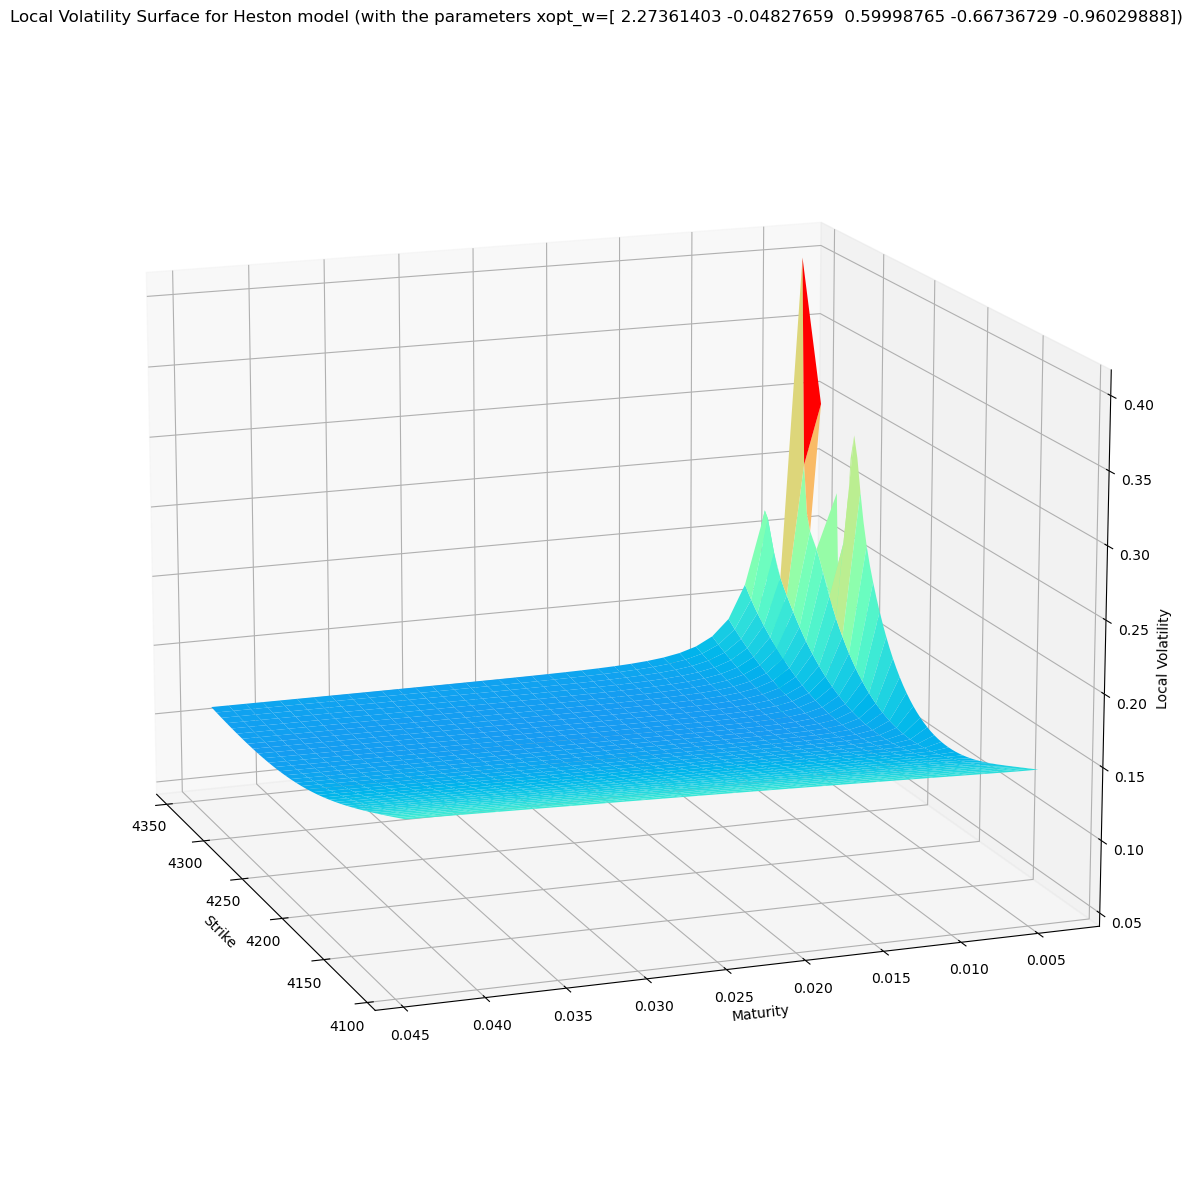

In [122]:
params_ = xopt
model_ = 'Heston'
title_ = f'Local Volatility Surface for Heston model (with the parameters xopt_w={xopt})'
vol_surface(params_,strikes,maturities,modelPrices,model_, title_)

## 2.2 Local Volatility Surface for VGSA model

Computing the prices according to the model and the opt-parameters


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:46<00:00,  1.55it/s]


Computing the local volatility surface


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 3834.46it/s]


(71, 36)
(71, 36)


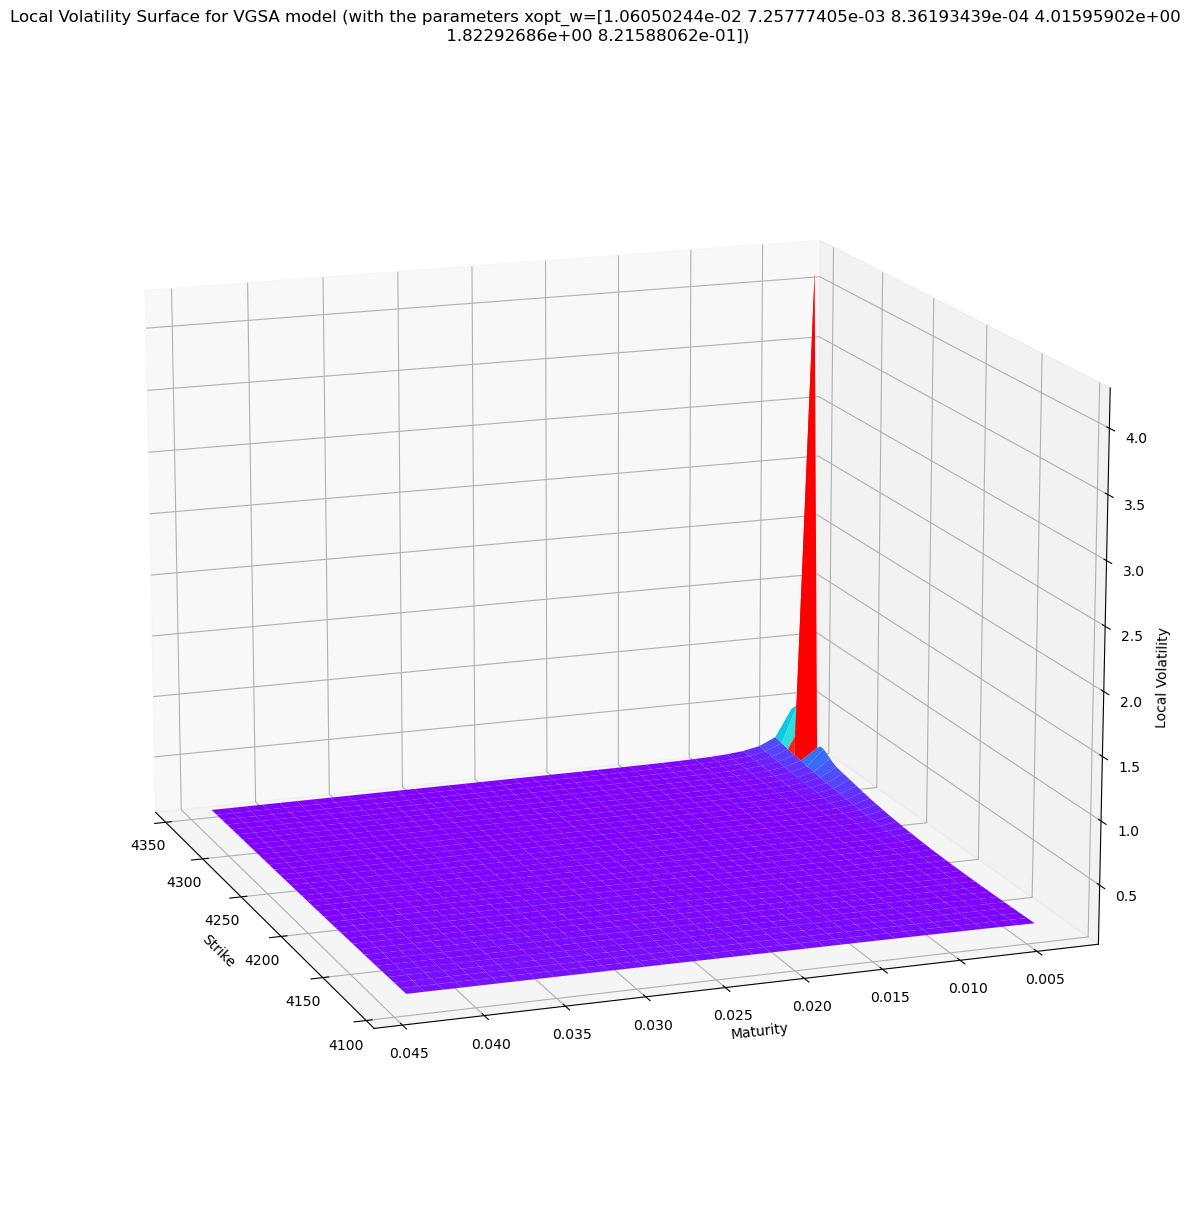

In [123]:
params_ = xopt_v_w
model_ = 'VGSA'
title_ = f'Local Volatility Surface for {model_} model (with the parameters xopt_w={params_})'
vol_surface(params_,strikes,maturities,modelPrices,model_, title_)

Computing the prices according to the model and the opt-parameters


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 73/73 [00:46<00:00,  1.55it/s]


Computing the local volatility surface


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 71/71 [00:00<00:00, 2386.07it/s]


(71, 36)
(71, 36)


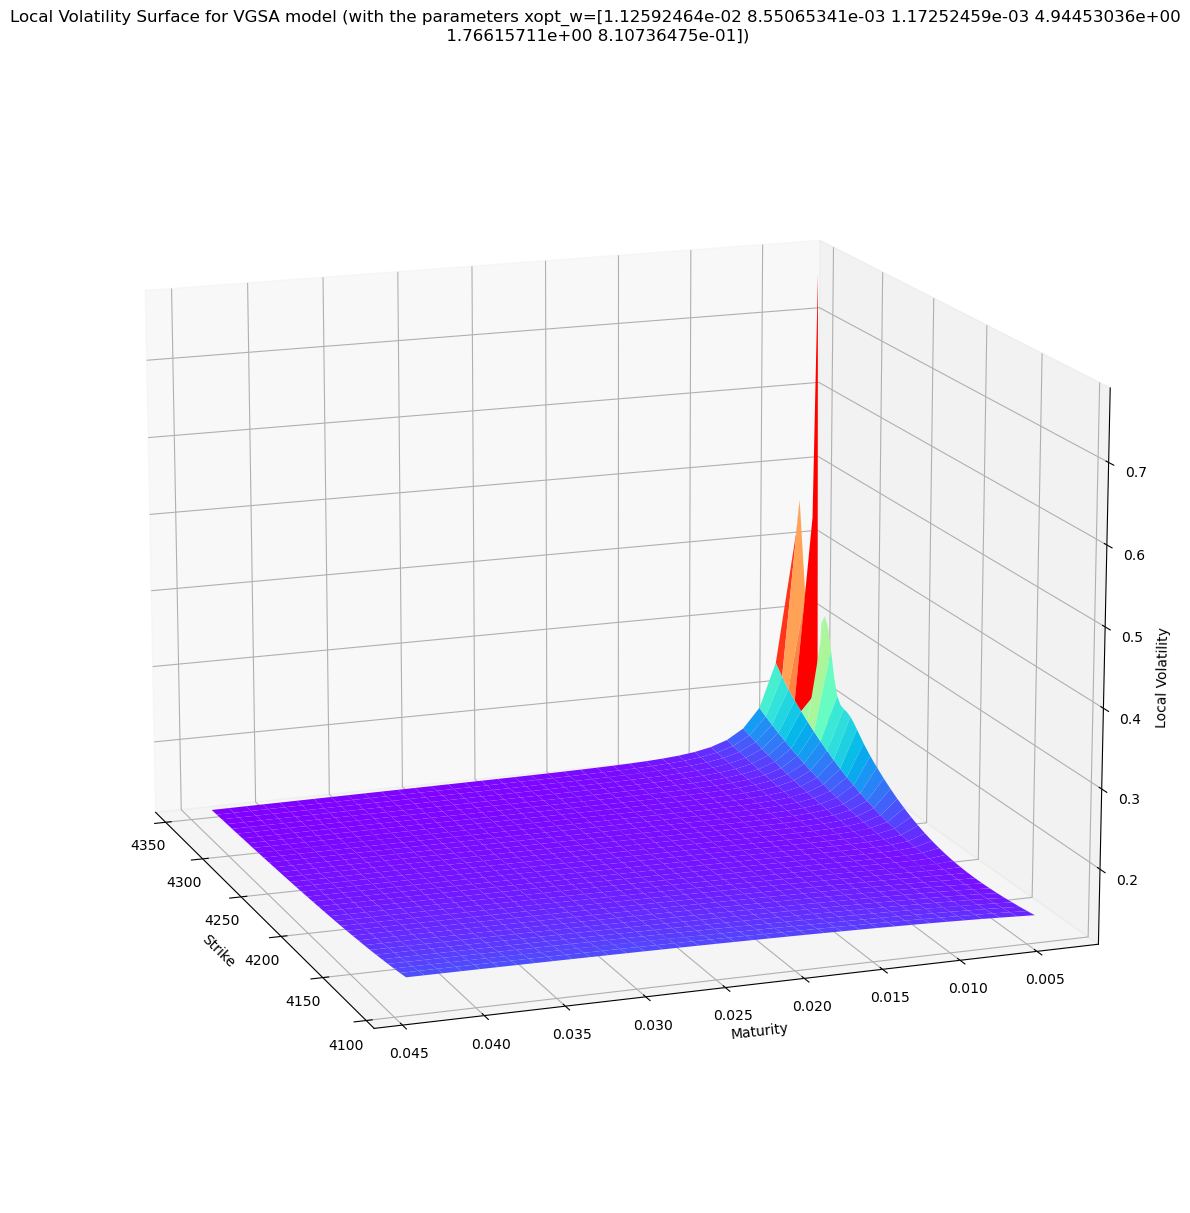

In [124]:
params_ = xopt_v
model_ = 'VGSA'
title_ = f'Local Volatility Surface for {model_} model (with the parameters xopt_w={params_})'
vol_surface(params_,strikes,maturities,modelPrices,model_, title_)

# 3. Findings/Observations

Write down your findings/observations on comparing the local volatility surface implied from Heston call surface with the one implied form VGSA call surface

test: 

The Heston model assumes a constant correlation between the underlying asset and volatility, while the VGSA model allows for a varying correlation. This results in differences in the local volatility surface between the two models.

The VGSA model is more flexible than the Heston model in terms of fitting market data. It can capture different shapes and behaviors of the implied volatility surface more accurately.

The VGSA model may produce a smoother local volatility surface compared to the Heston model, which can exhibit more volatility and fluctuations.

The VGSA model may produce a more accurate and stable pricing of exotic options with complex payoff structures, as it can capture the non-normality and skewness of the underlying asset.

The Heston model is widely used in practice due to its simplicity and easy calibration to market data, while the VGSA model may require more computational resources and expertise in model calibration.

Overall, the choice between the Heston and VGSA models depends on the specific application and requirements of the user, as well as the availability and quality of market data.





Regenerate response